<a href="https://colab.research.google.com/github/SimonZhu816/AIGC/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error

In [ ]:
# 读取数据
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/creditcard.csv")
train , test = data[data.index % 10 < 7] , data[data.index % 10 >= 7]

In [ ]:
# 训练模型
X, y = train[data.columns[1:-2]], train[data.columns[-1:]]
clf = tree.DecisionTreeClassifier(
              criterion = 'gini',
              max_depth = 4,
              min_samples_leaf = 5000,
              splitter = 'best')
clf = clf.fit(X, y)

[Text(0.3333333333333333, 0.9, 'node #0\nx[13] <= -1.978\ngini = 0.003\nsamples = 199367\nvalue = [199035, 332]'),
 Text(0.16666666666666666, 0.7, 'node #1\ngini = 0.107\nsamples = 5000\nvalue = [4716, 284]'),
 Text(0.5, 0.7, 'node #2\nx[13] <= -1.381\ngini = 0.0\nsamples = 194367\nvalue = [194319, 48]'),
 Text(0.3333333333333333, 0.5, 'node #3\ngini = 0.005\nsamples = 5902\nvalue = [5888, 14]'),
 Text(0.6666666666666666, 0.5, 'node #4\nx[3] <= 2.737\ngini = 0.0\nsamples = 188465\nvalue = [188431, 34]'),
 Text(0.5, 0.3, 'node #5\nx[19] <= -0.726\ngini = 0.0\nsamples = 180698\nvalue = [180677, 21]'),
 Text(0.3333333333333333, 0.1, 'node #6\ngini = 0.002\nsamples = 5000\nvalue = [4994, 6]'),
 Text(0.6666666666666666, 0.1, 'node #7\ngini = 0.0\nsamples = 175698\nvalue = [175683, 15]'),
 Text(0.8333333333333334, 0.3, 'node #8\ngini = 0.003\nsamples = 7767\nvalue = [7754, 13]')]

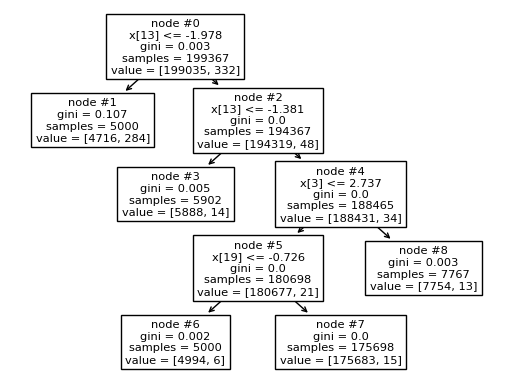

In [ ]:
# 决策树图
tree.plot_tree(clf,node_ids=True)

In [ ]:
# 忽略警告
warnings.filterwarnings('ignore')

test.loc[:, 'prob1'] = [prob1 for prob0,prob1 in clf.predict_proba(test[data.columns[1:-2]])]
test['cut'] = pd.qcut(test['prob1'],q=100,duplicates='drop')
test.groupby(['cut'])['Class'].agg([np.size,np.sum,np.mean],)

,size,sum,mean
cut,,,
"(-0.0009146, 0.0012]",77442,13,0.000168
"(0.0012, 0.00167]",3312,7,0.002114
"(0.00167, 0.00237]",2558,3,0.001173
"(0.00237, 0.0568]",2128,137,0.064380
